# Download dataset

In [ ]:
# Set download destination as /content
Sys.setenv(KAGGLE_CONFIG_DIR = "/content")

# Download dataset with curl
system("curl -L -o /content/archive.zip https://www.kaggle.com/api/v1/datasets/download/birdy654/deep-voice-deepfake-voice-recognition")

# Create data directory
system("mkdir -p /content/data")

# Unzip the file into /content/data/
system("unzip /content/archive.zip -d /content/data/")


In [ ]:
data <- read.csv("/content/data/KAGGLE/DATASET-balanced.csv")

In [ ]:
data

chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,⋯,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.338055,0.027948,2842.949,4322.917,6570.586,0.041050,-462.1696,90.31127,19.073769,24.046888,⋯,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
0.443766,0.037838,2336.130,3445.777,3764.950,0.047730,-409.4134,120.34881,-7.161531,5.114784,⋯,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
0.302528,0.056578,2692.988,2861.133,4716.610,0.080342,-318.9960,120.49027,-24.625771,23.891073,⋯,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
0.319933,0.031504,2241.665,3503.766,3798.642,0.047180,-404.6367,136.32091,2.308172,-3.907071,⋯,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
0.420055,0.016158,2526.069,3102.660,5025.078,0.051905,-410.4979,152.73140,-18.266771,51.993462,⋯,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE
0.442880,0.012317,3952.880,3702.718,7104.090,0.115387,-498.1797,97.24526,-21.382017,45.624386,⋯,-6.466366,2.856888,-0.157036,-2.824058,0.383832,-1.089466,2.998828,-5.218136,-1.423959,FAKE
0.453897,0.021782,4178.072,3698.645,7508.242,0.131647,-410.3831,97.02673,-22.508402,49.689598,⋯,-5.320498,-4.209944,-2.051953,-0.714617,-7.889741,-0.377954,-8.421499,-5.800948,-12.060839,FAKE
0.474154,0.011107,3993.040,3948.154,7872.564,0.114879,-440.8190,103.02953,-21.213911,49.066498,⋯,2.810230,-2.150585,-1.529685,3.354003,-6.589828,5.678379,-2.742477,-5.159016,-10.969421,FAKE
0.602690,0.000970,3815.431,3992.518,6887.565,0.121769,-539.9651,94.81163,-51.388660,33.196476,⋯,-1.619109,10.417936,-9.675606,-0.937404,0.909395,4.827445,5.055848,-3.618021,5.053717,FAKE


# Class Imbalance

In [ ]:
labels <- table(data$LABEL)

In [ ]:
labels


FAKE REAL 
5889 5889 

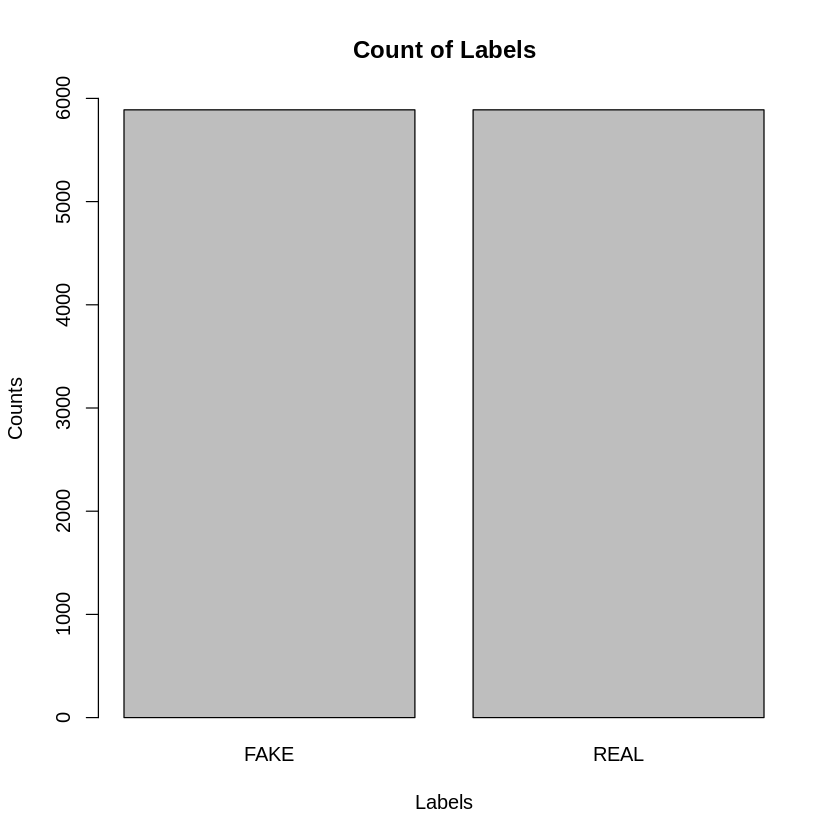

In [ ]:
barplot(labels,
        main = "Count of Labels",
        xlab = "Labels",
        ylab = "Counts",
        ylim = c(0, 6000))

# Feature Distribution

In [ ]:
library(ggplot2)
library(tidyr)

In [ ]:
summary(data)

  chroma_stft          rms           spectral_centroid spectral_bandwidth
 Min.   :0.2004   Min.   :0.000043   Min.   :  756.2   Min.   :1097      
 1st Qu.:0.3723   1st Qu.:0.015098   1st Qu.: 2062.9   1st Qu.:2569      
 Median :0.4177   Median :0.031871   Median : 2580.0   Median :3056      
 Mean   :0.4219   Mean   :0.037894   Mean   : 2719.2   Mean   :3050      
 3rd Qu.:0.4677   3rd Qu.:0.054046   3rd Qu.: 3283.9   3rd Qu.:3581      
 Max.   :0.7072   Max.   :0.168958   Max.   :17685.0   Max.   :7837      
    rolloff      zero_crossing_rate     mfcc1             mfcc2       
 Min.   : 1064   Min.   :0.01550    Min.   :-1055.0   Min.   :-83.82  
 1st Qu.: 3448   1st Qu.:0.04575    1st Qu.: -432.9   1st Qu.:120.52  
 Median : 4684   Median :0.06024    Median : -365.8   Median :145.97  
 Mean   : 4978   Mean   :0.07082    Mean   : -382.6   Mean   :145.06  
 3rd Qu.: 6211   3rd Qu.:0.08515    3rd Qu.: -321.8   3rd Qu.:168.32  
 Max.   :21131   Max.   :0.81248    Max.   : -193.4   Ma

In [ ]:
# Select the numerical features. Otherwise, will error.
numerical_features <- data[, sapply(data, is.numeric)]

# Z-Scale Normalization
scaled_data <- scale(numerical_features)

scaled_data <- as.data.frame(scaled_data)
head(scaled_data)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,⋯,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.20865112,-0.354317596,0.11600370,1.45899014,0.73403325,-0.7576704,-1.0001741,-1.5127742,1.578626687,0.1216879,⋯,-1.5452713,-0.3396504,0.4997968,-0.9618837,0.28690484,1.1353625,-0.3623908,0.8180521,-0.4556794,-0.4292384
2,0.31474627,-0.001999514,-0.35910014,0.45339425,-0.55879231,-0.5876632,-0.3373534,-0.6827445,0.632493654,-0.7204714,⋯,0.3384531,0.3490067,-1.0189284,0.1398754,0.59746976,-0.6714152,0.2632915,0.2731786,-1.3683618,-0.7423287
3,-1.72062942,0.665588036,-0.02457265,-0.21687009,-0.12027115,0.2423177,0.7986374,-0.6788354,0.002674504,0.1147567,⋯,-0.1108782,-0.2137472,-0.4035810,-0.8451346,-0.51126137,-0.7872934,0.5059054,0.3014140,-0.2356595,-0.4755881
4,-1.46980660,-0.227639831,-0.44765303,0.51987583,-0.54326734,-0.6016608,-0.2773400,-0.2413861,0.974002950,-1.1217918,⋯,0.4861402,0.3842063,-0.0759028,-0.9478084,-0.13984581,1.0397083,0.7487744,-0.4601523,-0.1817171,0.2103541
5,-0.02695209,-0.774320649,-0.18104654,0.06002753,0.02186945,-0.4814088,-0.3509790,0.2120864,0.232001401,1.3648390,⋯,1.7250868,0.3760391,0.4819868,1.5605850,1.86630321,1.6308223,1.3420608,1.1522035,0.1937763,-0.1156551
6,0.30197815,-0.911151161,1.15647851,0.74796374,0.97986959,1.1342190,-1.4525994,-1.3211669,0.119655168,1.0815225,⋯,0.5044344,-0.3063623,0.8814650,0.3647014,-0.04422661,0.3599442,0.4852808,1.2289611,-0.4970292,0.5481828


In [ ]:
summary(scaled_data)

  chroma_stft            rms          spectral_centroid spectral_bandwidth 
 Min.   :-3.19307   Min.   :-1.3484   Min.   :-1.8402   Min.   :-2.239470  
 1st Qu.:-0.71472   1st Qu.:-0.8121   1st Qu.:-0.6153   1st Qu.:-0.551453  
 Median :-0.06078   Median :-0.2146   Median :-0.1305   Median : 0.006378  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000  
 3rd Qu.: 0.66025   3rd Qu.: 0.5754   3rd Qu.: 0.5293   3rd Qu.: 0.608732  
 Max.   : 4.11111   Max.   : 4.6690   Max.   :14.0293   Max.   : 5.487529  
    rolloff        zero_crossing_rate     mfcc1             mfcc2         
 Min.   :-1.8034   Min.   :-1.4078    Min.   :-8.4484   Min.   :-6.32447  
 1st Qu.:-0.7048   1st Qu.:-0.6381    1st Qu.:-0.6328   1st Qu.:-0.67794  
 Median :-0.1353   Median :-0.2694    Median : 0.2111   Median : 0.02525  
 Mean   : 0.0000   Mean   : 0.0000    Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.5685   3rd Qu.: 0.3647    3rd Qu.: 0.7638   3rd Qu.: 0.64288  
 Max.   : 7.4432  

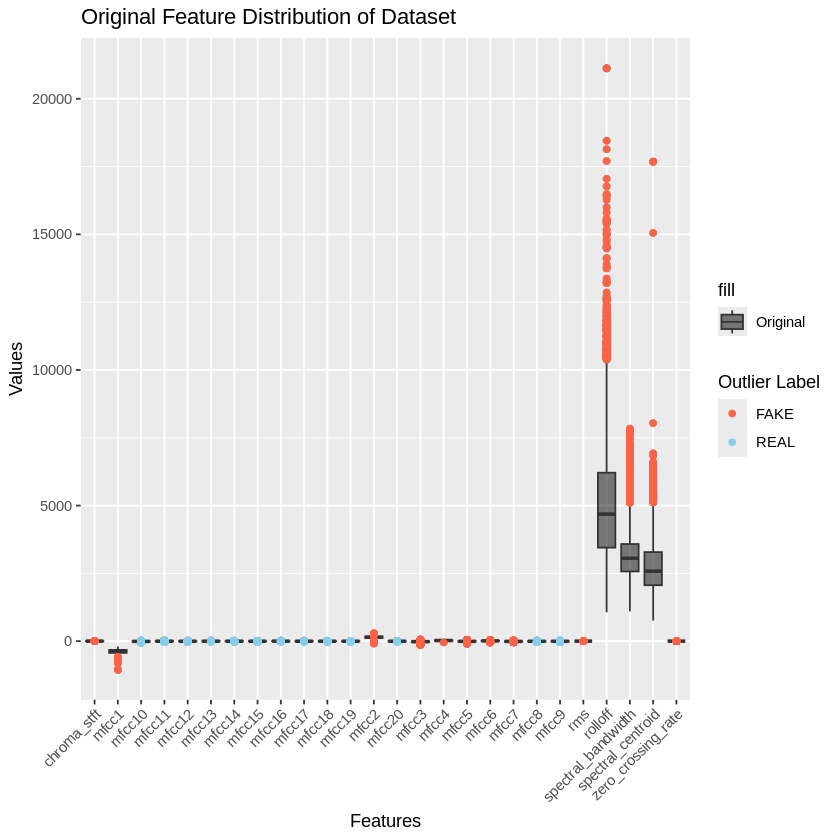

In [ ]:
original_features <- gather(numerical_features, key = "Feature", value = "Original_Value")
original_features$LABEL <- rep(data$LABEL, each = ncol(numerical_features))

ggplot(original_features, aes(x = Feature, y = Original_Value)) +
  geom_boxplot(aes(fill = "Original"), alpha = 0.5) +

  # Plot outliers with different colors for the LABEL
  geom_point(
    aes(color = LABEL),
    size = 1.5,
    shape = 19,
    data = original_features %>%
      dplyr::group_by(Feature) %>%
      dplyr::filter(Original_Value > quantile(Original_Value, 0.75) + 1.5 * IQR(Original_Value) |
                    Original_Value < quantile(Original_Value, 0.25) - 1.5 * IQR(Original_Value))
  ) +

  labs(title = "Original Feature Distribution of Dataset",
       x = "Features", y = "Values", fill = "Label", color = "Outlier Label") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = "black") +
  scale_color_manual(values = c("REAL" = "skyblue", "FAKE" = "tomato"))


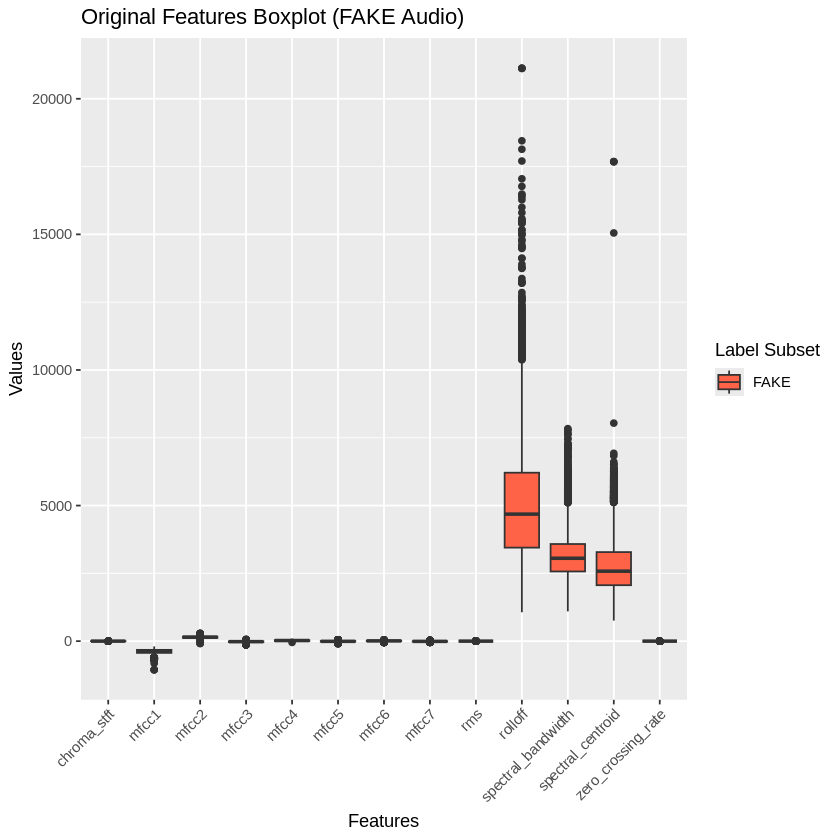

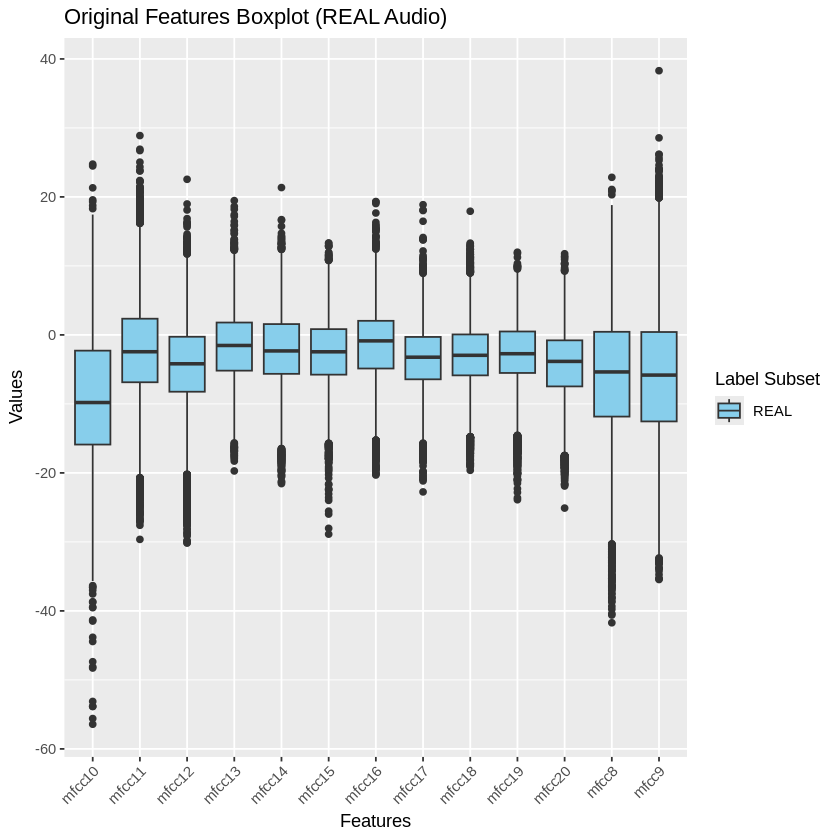

In [ ]:
# Subset the data based on FAKE and REAL labels
fake_original_features <- subset(original_features, LABEL == "FAKE")
real_original_features <- subset(original_features, LABEL == "REAL")

# FAKE label boxplot
ggplot(fake_original_features, aes(x = Feature)) +
  geom_boxplot(aes(y = Original_Value, fill = "FAKE")) +
  labs(title = "Original Features Boxplot (FAKE Audio)",
       x = "Features", y = "Values", fill = "Label Subset") +
  scale_fill_manual(values = "tomato") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# REAL label boxplot
ggplot(real_original_features, aes(x = Feature)) +
  geom_boxplot(aes(y = Original_Value, fill = "REAL")) +
  labs(title = "Original Features Boxplot (REAL Audio)",
       x = "Features", y = "Values", fill = "Label Subset") +
  scale_fill_manual(values = "skyblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

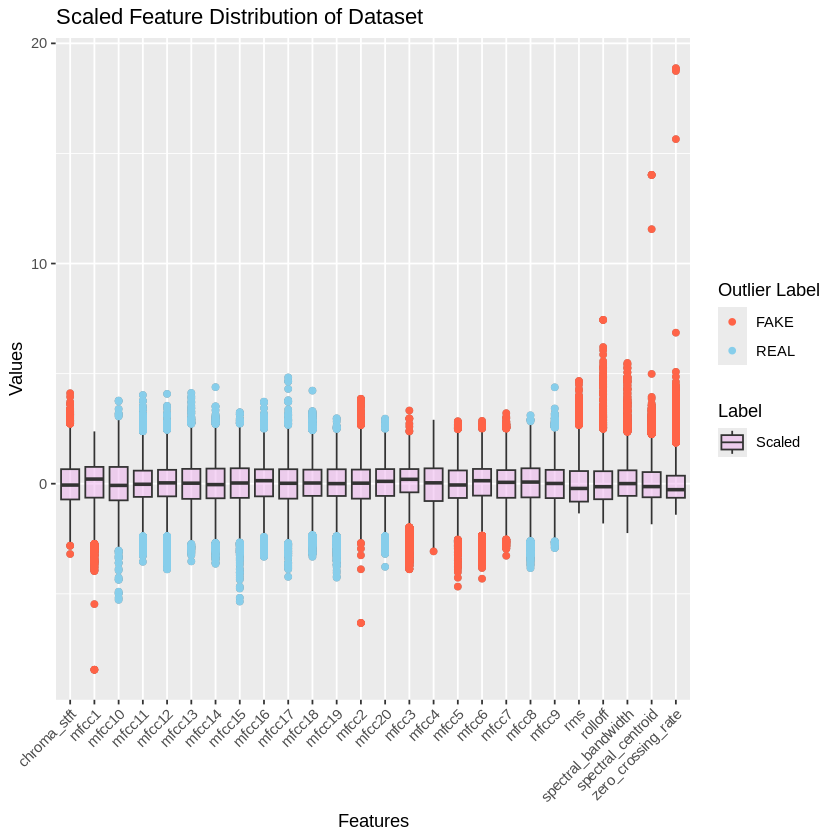

In [ ]:
scaled_features <- gather(scaled_data, key = "Feature", value = "Scaled_Value")
scaled_features$LABEL <- rep(data$LABEL, each = ncol(numerical_features))

ggplot(scaled_features, aes(x = Feature, y = Scaled_Value)) +
  geom_boxplot(aes(y = Scaled_Value, fill = "Scaled"), alpha = 0.5) +

  # Plot outliers with different colors for the LABEL
  geom_point(
    aes(color = LABEL),
    size = 1.5,
    shape = 19,
    data = scaled_features %>%
      dplyr::group_by(Feature) %>%
      dplyr::filter(Scaled_Value > quantile(Scaled_Value, 0.75) + 1.5 * IQR(Scaled_Value) |
                    Scaled_Value < quantile(Scaled_Value, 0.25) - 1.5 * IQR(Scaled_Value))
  ) +

  labs(title = "Scaled Feature Distribution of Dataset",
       x = "Features", y = "Values", fill = "Label", color = "Outlier Label") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = "plum2") +
  scale_color_manual(values = c("REAL" = "skyblue", "FAKE" = "tomato"))


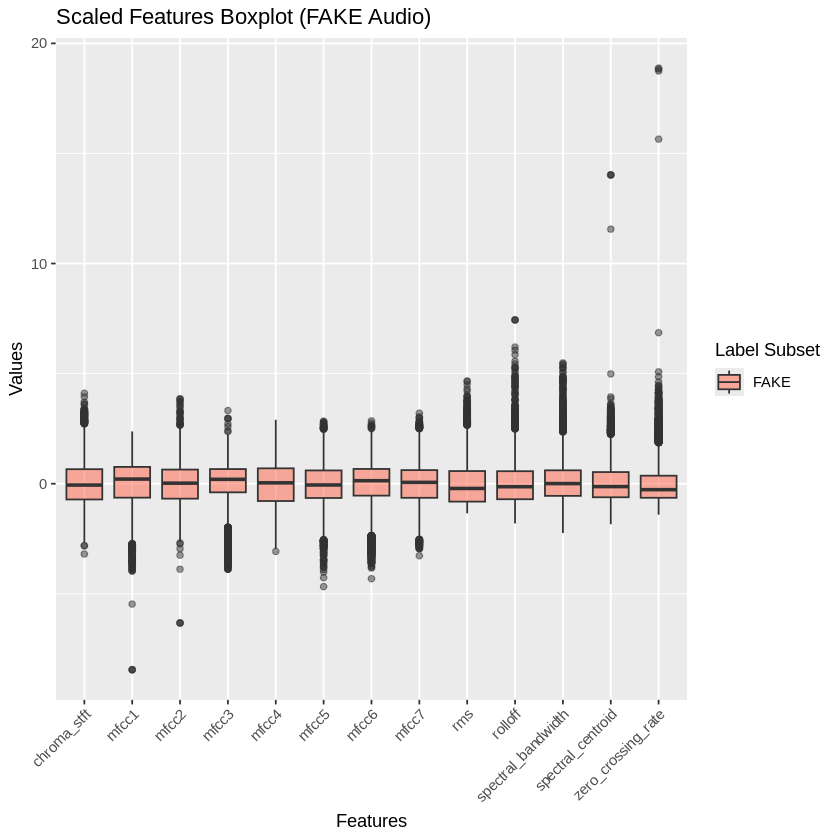

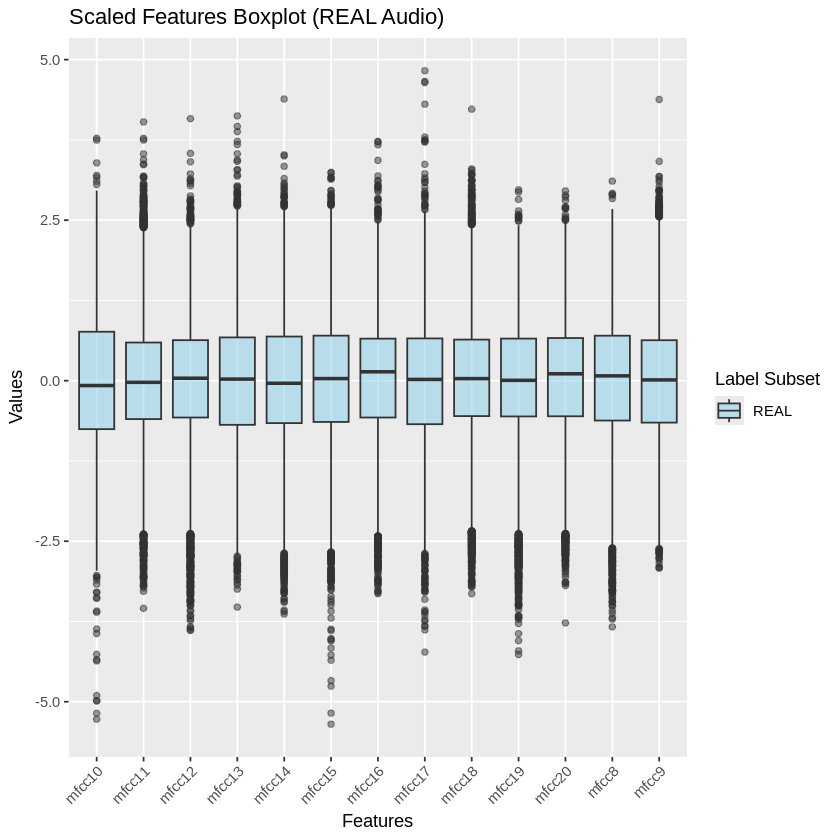

In [ ]:
# Subset the data based on FAKE and REAL labels
fake_scaled_features <- subset(scaled_features, LABEL == "FAKE")
real_scaled_features <- subset(scaled_features, LABEL == "REAL")

# FAKE label boxplot
ggplot(fake_scaled_features, aes(x = Feature)) +
  geom_boxplot(aes(y = Scaled_Value, fill = "FAKE"), alpha = 0.5) +
  labs(title = "Scaled Features Boxplot (FAKE Audio)",
       x = "Features", y = "Values", fill = "Label Subset") +
  scale_fill_manual(values = "tomato") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# REAL label boxplot
ggplot(real_scaled_features, aes(x = Feature)) +
  geom_boxplot(aes(y = Scaled_Value, fill = "REAL"), alpha = 0.5) +
  labs(title = "Scaled Features Boxplot (REAL Audio)",
       x = "Features", y = "Values", fill = "Label Subset") +
  scale_fill_manual(values = "skyblue") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Feature Correlation

In [ ]:
install.packages("corrplot")
install.packages("pheatmap")
install.packages("fpc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [ ]:
library(ggplot2)
library(corrplot)

In [ ]:
# Subset the data to only numeric columns
numerical_features <- data[, sapply(data, is.numeric)]

# Calculate the correlation matrix
corr_matrix <- cor(numerical_features, use = "complete.obs")
corr_matrix


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,⋯,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
chroma_stft,1.00000000,-0.297950291,0.358820671,0.344431401,0.39364738,0.34405887,-0.22943973,-0.23661738,0.06355869,0.21541415,⋯,0.27952333,0.323543538,0.129525794,0.16262848,0.12493223,0.15298531,0.211911464,0.19499786,0.180316148,0.117108101
rms,-0.29795029,1.000000000,-0.571988028,-0.693900515,-0.54398683,-0.42362738,0.75597968,0.41800591,0.28591192,-0.27938402,⋯,-0.26665693,-0.005382499,-0.202957199,-0.02556600,0.17005146,-0.05501415,0.039980829,0.07813249,0.210032896,0.301149382
spectral_centroid,0.35882067,-0.571988028,1.000000000,0.804265072,0.95189349,0.92307518,-0.42589593,-0.87792982,-0.10322225,0.58113271,⋯,-0.12368590,0.008288848,-0.158618684,-0.28431701,-0.21723885,-0.29958787,-0.124964667,-0.29087565,-0.260296082,-0.525101502
spectral_bandwidth,0.34443140,-0.693900515,0.804265072,1.000000000,0.86586757,0.55598861,-0.68497701,-0.73871622,0.08029940,0.47009793,⋯,-0.01768326,0.099876777,0.018350073,-0.14271058,-0.11508670,-0.11637232,0.004998676,-0.15419895,-0.209687157,-0.378384479
rolloff,0.39364738,-0.543986825,0.951893491,0.865867566,1.00000000,0.80535689,-0.43817834,-0.83609512,-0.02489510,0.58586726,⋯,-0.12443532,0.017395265,-0.116898599,-0.23571691,-0.17080544,-0.25912154,-0.063865876,-0.25778803,-0.200592548,-0.460707062
zero_crossing_rate,0.34405887,-0.423627382,0.923075176,0.555988608,0.80535689,1.00000000,-0.28324942,-0.77422727,-0.14360737,0.45682751,⋯,-0.13773326,-0.039362509,-0.226071130,-0.31000837,-0.24315484,-0.30970594,-0.201076271,-0.31077726,-0.233624987,-0.476439304
mfcc1,-0.22943973,0.755979682,-0.425895930,-0.684977007,-0.43817834,-0.28324942,1.00000000,0.26693083,-0.16287162,-0.07084022,⋯,-0.22013109,-0.021445475,-0.202265575,-0.19811469,0.03663001,-0.19016745,-0.073128731,0.01166601,0.031662753,0.054690641
mfcc2,-0.23661738,0.418005910,-0.877929817,-0.738716222,-0.83609512,-0.77422727,0.26693083,1.00000000,-0.06081698,-0.65402778,⋯,0.26635739,-0.047697383,0.190792157,0.39441933,0.12484477,0.37733992,0.093990348,0.21011453,0.298159161,0.565021871
mfcc3,0.06355869,0.285911921,-0.103222249,0.080299396,-0.02489510,-0.14360737,-0.16287162,-0.06081698,1.00000000,0.11578492,⋯,-0.28995417,0.214081287,-0.059854491,0.15562134,0.32619962,0.01743422,0.275656036,0.11529588,0.291052679,0.204059706
mfcc4,0.21541415,-0.279384022,0.581132712,0.470097927,0.58586726,0.45682751,-0.07084022,-0.65402778,0.11578492,1.00000000,⋯,-0.10115573,-0.046872333,-0.071297679,-0.10154554,-0.01594039,-0.22597782,0.074913904,-0.02603178,-0.117870247,-0.351510603


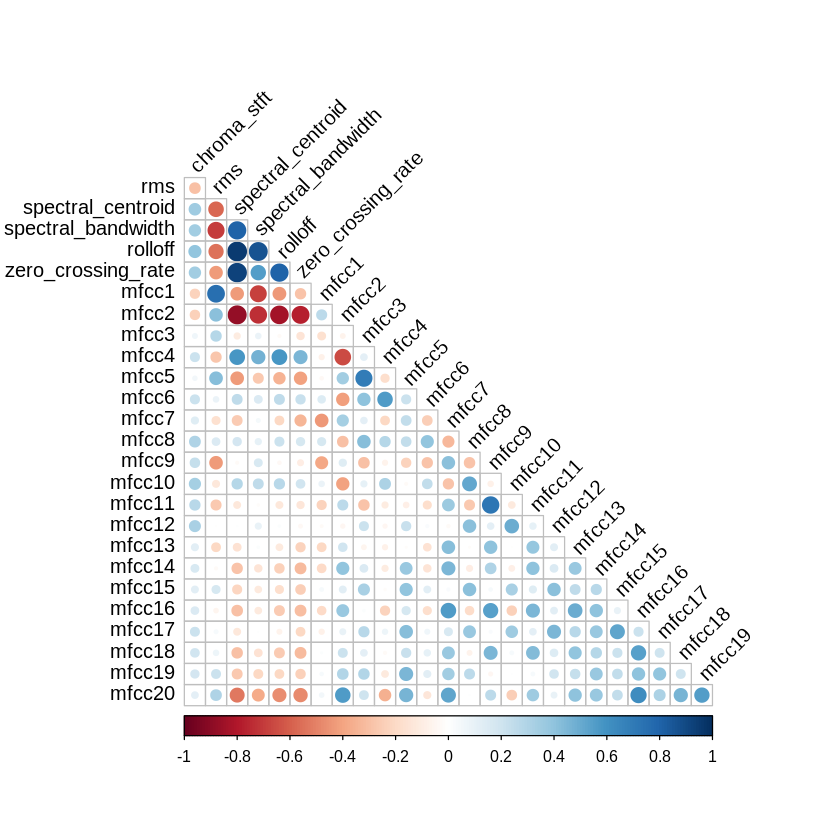

In [ ]:
# Plot the correlation matrix
corrplot(corr_matrix,
         method = "circle",      # Use 'circle' method to represent correlation
         type = "lower",         # Only plot the lower triangle
         tl.col = "black",       # Set the color of the text labels to black
         tl.srt = 45,           # Angle the text on the diagonal
         addCoef.col = NULL,     # Do not show correlation coefficients
         number.cex = 0,         # Do not show the number
         diag = FALSE)           # Do not show self-correlation

## Clustering Features

In [ ]:
library(pheatmap)
library(cluster)
library(fpc)

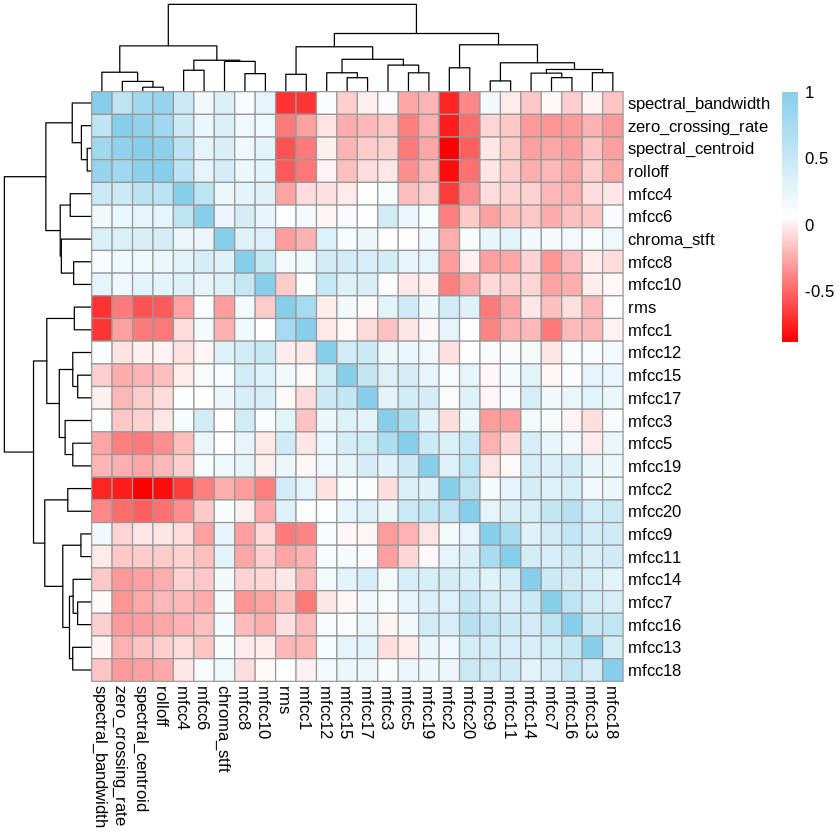

In [ ]:
# Finding clustered features using pheatmap
heatmap_result <- pheatmap(corr_matrix, display_numbers = FALSE,
                           cluster_rows = TRUE, cluster_cols = TRUE,
                           color = colorRampPalette(c("red", "white", "skyblue"))(1000))

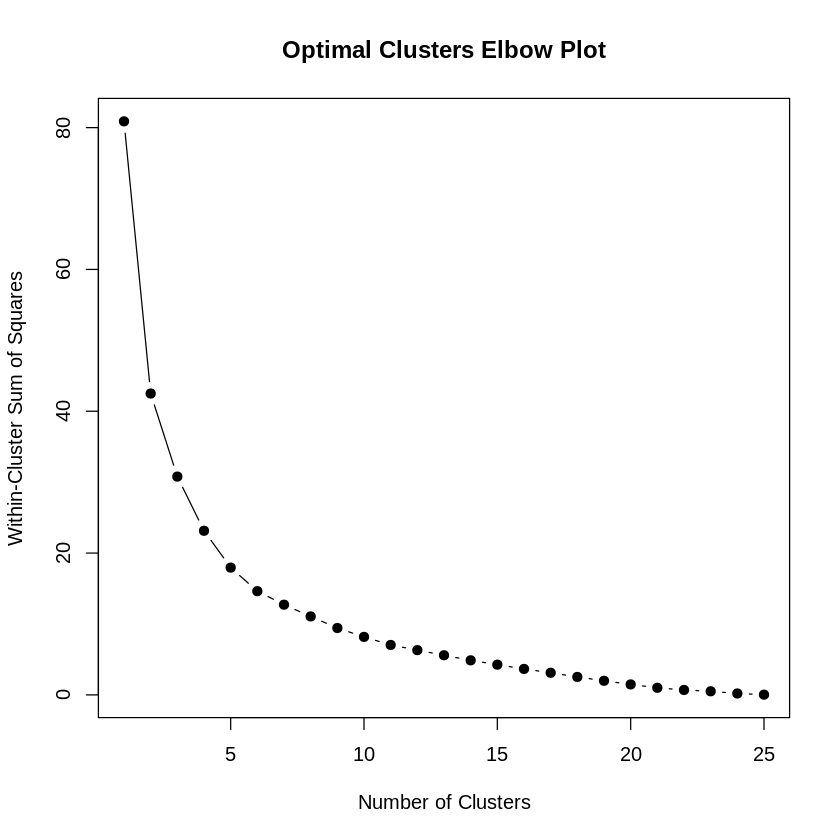

In [ ]:
max_k <- nrow(corr_matrix) - 1

# Store WCSS for each k
wcss <- numeric(max_k)

# K-means clustering and calculate the WCSS
for (k in 1:max_k) {
  kmeans_result <- kmeans(corr_matrix, centers = k, nstart = 100)
  wcss[k] <- kmeans_result$tot.withinss
}

plot(1:max_k, wcss, type = "b", pch = 19, xlab = "Number of Clusters", ylab = "Within-Cluster Sum of Squares",
     main = "Optimal Clusters Elbow Plot")

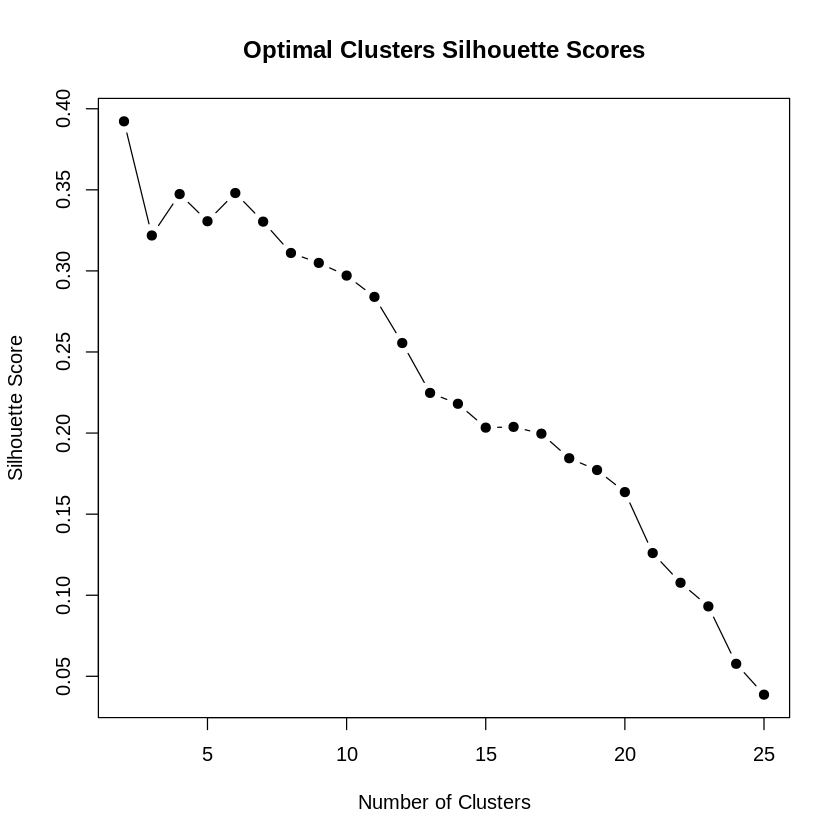

In [ ]:
max_k <- nrow(corr_matrix) - 1

# Store silhouette scores for each k
silhouette_scores <- numeric(max_k)

# K-means clustering and calculate the silhouette score
for (k in 2:max_k) {
  kmeans_result <- kmeans(corr_matrix, centers = k, nstart = 100)
  silhouette_scores[k] <- mean(silhouette(kmeans_result$cluster, dist(corr_matrix))[, 3])
}

plot(2:max_k, silhouette_scores[2:max_k], type = "b", pch = 19,
     xlab = "Number of Clusters", ylab = "Silhouette Score",
     main = "Optimal Clusters Silhouette Scores")

In [ ]:
# Sort and print silhouette scores in descending order
sorted_indices <- order(silhouette_scores[2:max_k], decreasing = TRUE)

cat("Clusters (Sorted by Silhouette Score):\n")
for (i in sorted_indices) {
  k_value <- i + 1  # We start from k = 2, so we offset index by 1
  cat("k =", k_value, "\tSilhouette Score =", silhouette_scores[k_value], "\n")
}

Clusters (Sorted by Silhouette Score):
k = 2 	Silhouette Score = 0.3922384 
k = 6 	Silhouette Score = 0.3480366 
k = 4 	Silhouette Score = 0.3473909 
k = 5 	Silhouette Score = 0.3306358 
k = 7 	Silhouette Score = 0.3303874 
k = 3 	Silhouette Score = 0.3218459 
k = 8 	Silhouette Score = 0.3110608 
k = 9 	Silhouette Score = 0.3049336 
k = 10 	Silhouette Score = 0.2971182 
k = 11 	Silhouette Score = 0.2839891 
k = 12 	Silhouette Score = 0.2555317 
k = 13 	Silhouette Score = 0.22477 
k = 14 	Silhouette Score = 0.2180597 
k = 16 	Silhouette Score = 0.2038141 
k = 15 	Silhouette Score = 0.2033572 
k = 17 	Silhouette Score = 0.1996328 
k = 18 	Silhouette Score = 0.1844703 
k = 19 	Silhouette Score = 0.1772252 
k = 20 	Silhouette Score = 0.1636073 
k = 21 	Silhouette Score = 0.1260088 
k = 22 	Silhouette Score = 0.1076929 
k = 23 	Silhouette Score = 0.09311635 
k = 24 	Silhouette Score = 0.05771233 
k = 25 	Silhouette Score = 0.03867977 


In [ ]:
# Cluster the features into k = 6 columns
cluster_groups <- cutree(heatmap_result$tree_col, k = 6)

# Turn clustered columns into dataframe
clustered_features <- data.frame(
  Feature = colnames(corr_matrix),
  Cluster = as.factor(cluster_groups)
)

# Group features by cluster
grouped_features <- split(colnames(corr_matrix), cluster_groups)

In [ ]:
# Cluster summary
for (i in unique(cluster_groups)) {
  cat("Cluster", i, "contains the following features:\n")
  cat(paste(grouped_features[[as.character(i)]], collapse = ", "), "\n\n")
}

Cluster 1 contains the following features:
chroma_stft, mfcc4, mfcc6, mfcc8, mfcc10 

Cluster 2 contains the following features:
rms, mfcc1 

Cluster 3 contains the following features:
spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate 

Cluster 4 contains the following features:
mfcc2, mfcc20 

Cluster 5 contains the following features:
mfcc3, mfcc5, mfcc12, mfcc15, mfcc17, mfcc19 

Cluster 6 contains the following features:
mfcc7, mfcc9, mfcc11, mfcc13, mfcc14, mfcc16, mfcc18 



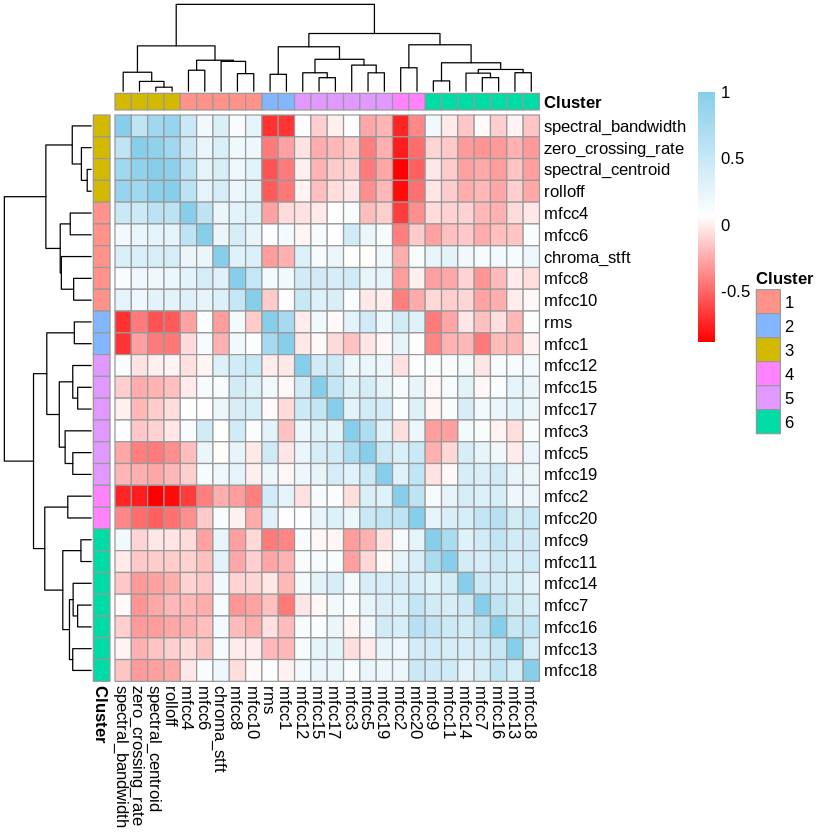

In [ ]:
# Create annotation for the features based on the clusters
column_annotation <- data.frame(Cluster = as.factor(cluster_groups))
row_annotation <- data.frame(Cluster = as.factor(cluster_groups))

# Annotated heatmap with clustered columns
pheatmap(corr_matrix, display_numbers = FALSE,
         cluster_rows = TRUE, cluster_cols = TRUE,
         color = colorRampPalette(c("red", "white", "skyblue"))(1000),
         annotation_col = column_annotation,
         annotation_row = row_annotation)


# Principal Component Analysis (PCA)

In [ ]:
library(ggplot2)

In [ ]:
pca_result <- prcomp(data[, sapply(data, is.numeric)], scale = TRUE)
pca_result

Standard deviations (1, .., p=26):
 [1] 2.6455447 2.0960724 1.9787287 1.3361442 1.1825654 1.0097378 0.9325414
 [8] 0.8915901 0.7840566 0.7136289 0.6890796 0.6805635 0.6258316 0.6072364
[15] 0.5888376 0.5483560 0.5001851 0.4896888 0.4474889 0.4235031 0.4140762
[22] 0.3966512 0.3033004 0.1912507 0.1499122 0.0712680

Rotation (n x k) = (26 x 26):
                           PC1         PC2          PC3          PC4
chroma_stft         0.07190206 -0.28791729  0.117050436 -0.102456881
rms                -0.18228724  0.28834052  0.202904046 -0.009659513
spectral_centroid   0.34389049 -0.15219097 -0.009888369  0.051460621
spectral_bandwidth  0.26968674 -0.25769521 -0.023473903  0.157335355
rolloff             0.32522884 -0.17519190  0.018329876  0.094142186
zero_crossing_rate  0.31500621 -0.08130732 -0.013546350  0.023332695
mfcc1              -0.09087412  0.31813035  0.131029256 -0.332235977
mfcc2              -0.33714835  0.09162354 -0.085319432 -0.027078342
mfcc3              -0.04641600 -0

In [ ]:
summary(pca_result)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6455 2.0961 1.9787 1.33614 1.18257 1.00974 0.93254
Proportion of Variance 0.2692 0.1690 0.1506 0.06866 0.05379 0.03921 0.03345
Cumulative Proportion  0.2692 0.4382 0.5888 0.65743 0.71121 0.75043 0.78387
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.89159 0.78406 0.71363 0.68908 0.68056 0.62583 0.60724
Proportion of Variance 0.03057 0.02364 0.01959 0.01826 0.01781 0.01506 0.01418
Cumulative Proportion  0.81445 0.83809 0.85768 0.87594 0.89376 0.90882 0.92300
                          PC15    PC16    PC17    PC18   PC19   PC20    PC21
Standard deviation     0.58884 0.54836 0.50019 0.48969 0.4475 0.4235 0.41408
Proportion of Variance 0.01334 0.01157 0.00962 0.00922 0.0077 0.0069 0.00659
Cumulative Proportion  0.93634 0.94790 0.95753 0.96675 0.9745 0.9813 0.98794
                          PC22    PC23    PC24

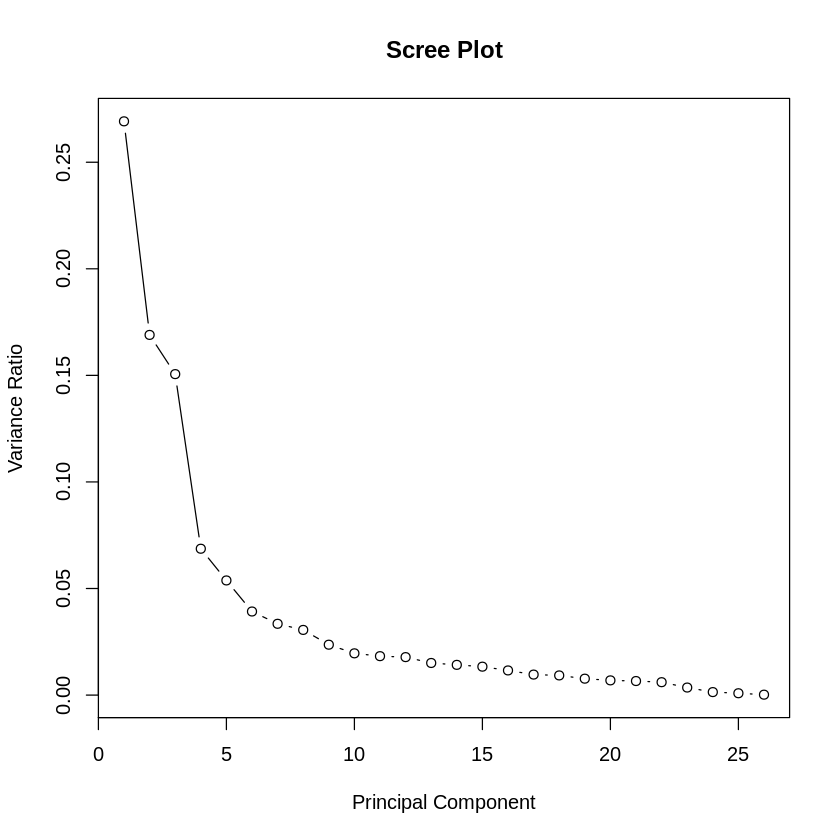

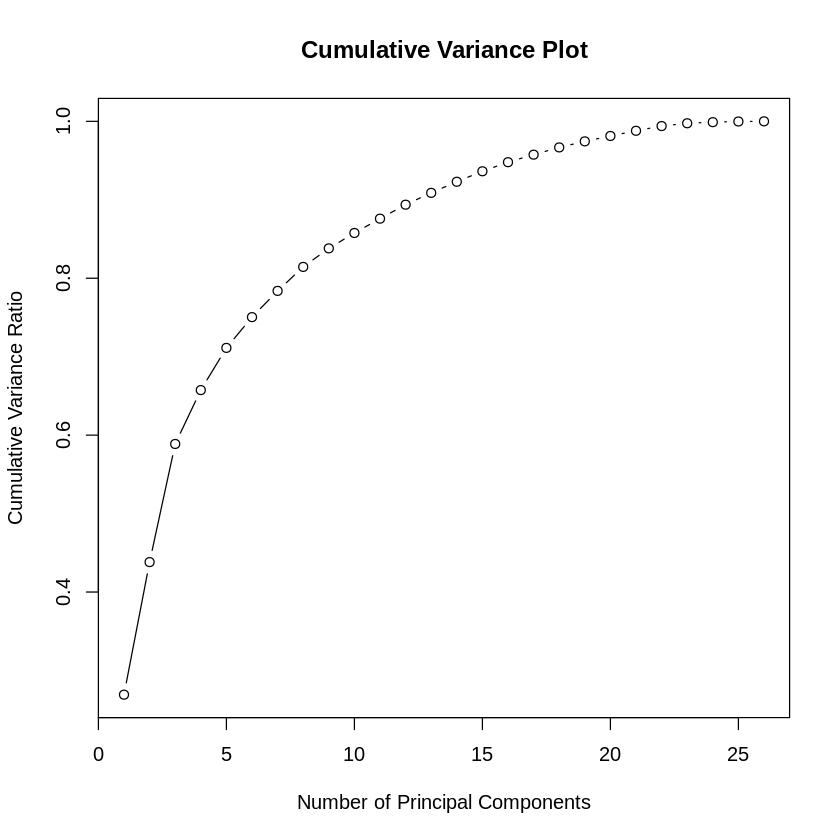

In [ ]:
# Extract the variance ratio for each component
variance_ratio <- pca_result$sdev^2 / sum(pca_result$sdev^2)

# Plot the variance ratios
plot(variance_ratio, type = "b", main = "Scree Plot",
     xlab = "Principal Component", ylab = "Variance Ratio")

# Plot the cumulative of variance ratios
cumulative_variance <- cumsum(variance_ratio)
plot(cumulative_variance, type = "b", main = "Cumulative Variance Plot",
     xlab = "Number of Principal Components", ylab = "Cumulative Variance Ratio")


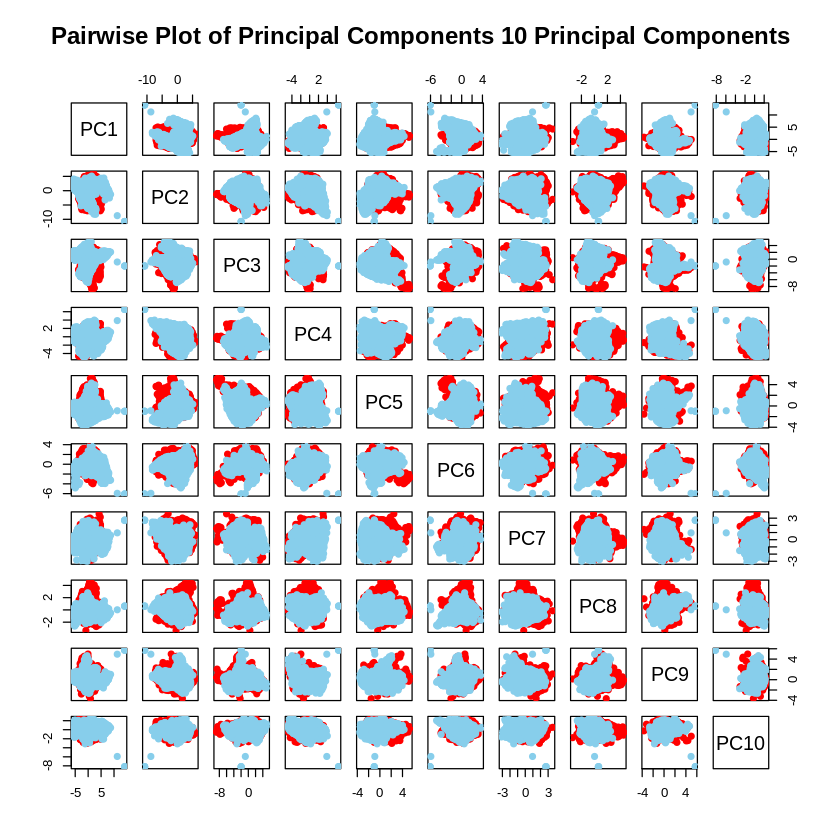

In [ ]:
# Dataframe with all principal components
pca_df <- data.frame(pca_result$x)
# Add the LABEL column
pca_df$LABEL <- data$LABEL

# Configure top number of PCs
num_pcs_to_plot <- 10

# Pairwise plot of principal components
pairs(pca_df[, 1:num_pcs_to_plot],
      col = ifelse(pca_df$LABEL == "FAKE", "red", "skyblue"),
      main = paste("Pairwise Plot of Principal Components", num_pcs_to_plot, "Principal Components"),
      pch = 19)
